# Neural Network from scratch using Numpy on some non-linear problems (20 pts)

In this notebook we will see how the neural network module we built using Numpy (nn.py) behaves in some non-linear classification problems.

For this:

- <font color='red'>You first need to fill some code in in the nn.py file (20 pts)</font> 
- then you can run the code in this notebook file

- We'll train the NN for some number of epochs and some hyperparameters
- Plot the live decision boundary 
- Plot the train and validation metrics such as the loss and the accuracies


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import nn

<font size="5">Neural Network Structure</font>

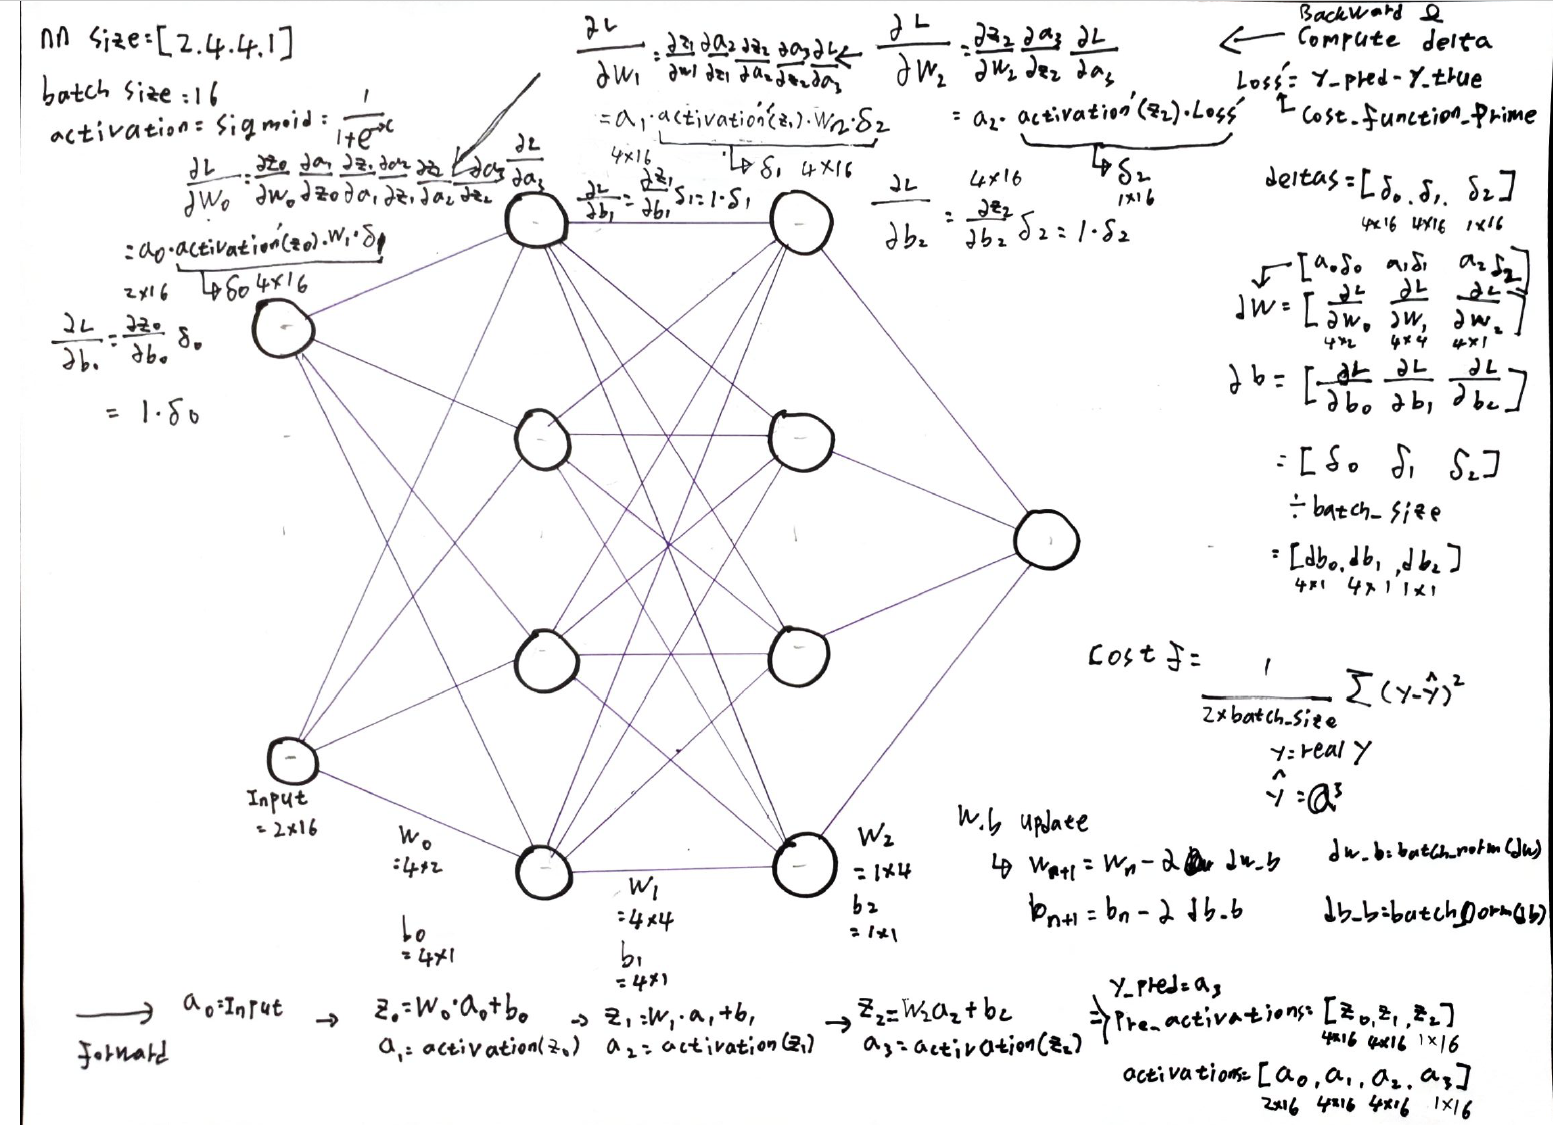

In [3]:
from IPython.display import Image
Image("nn_structure.png")

In [4]:
def plot_history(history):
    n = history['epochs']
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    n = 4000
    plt.plot(range(history['epochs'])[:n], history['train_loss'][:n], label='train_loss')
    plt.plot(range(history['epochs'])[:n], history['test_loss'][:n], label='test_loss')
    plt.title('train & test loss')
    plt.grid(1)
    plt.xlabel('epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(history['epochs'])[:n], history['train_acc'][:n], label='train_acc')
    plt.plot(range(history['epochs'])[:n], history['test_acc'][:n], label='test_acc')
    plt.title('train & test accuracy')
    plt.grid(1)
    plt.xlabel('epochs')
    plt.legend()

# Linear problem

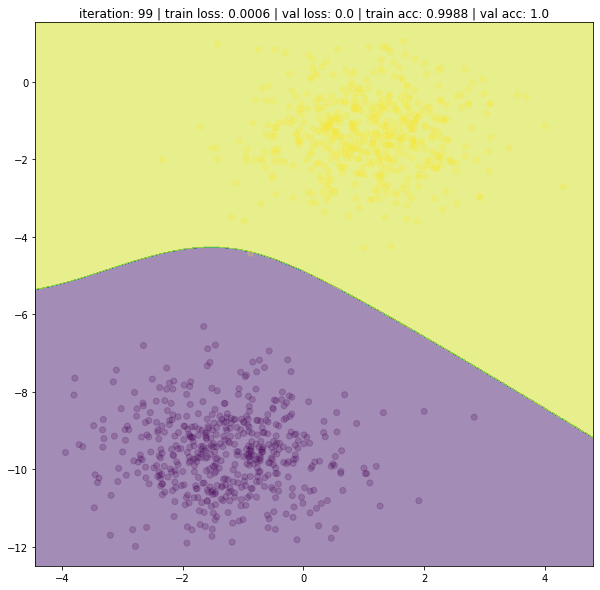

In [5]:
data = datasets.make_blobs(n_samples=1000, centers=2, random_state=2)
X = data[0].T
y = np.expand_dims(data[1], 1).T

neural_net = nn.NeuralNetwork([2, 4, 4, 1], seed=0)
history = neural_net.train(X=X, y=y, batch_size=16, epochs=100, learning_rate=0.4, print_every=200, validation_split=0.2,
                          tqdm_=False, plot_every=10)

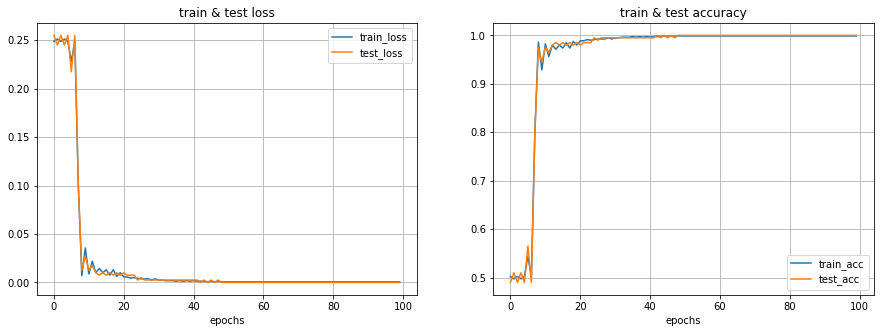

In [6]:
plot_history(history)

# Noisy moons

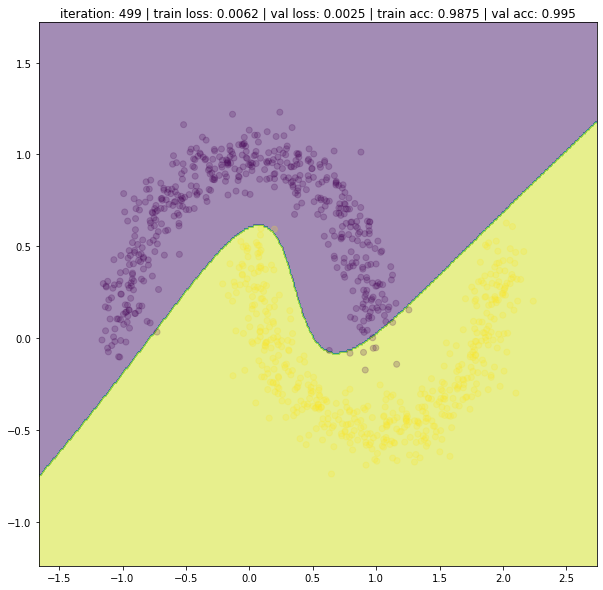

In [7]:
data = datasets.make_moons(n_samples=1000, noise=0.1)
X = data[0].T
y = np.expand_dims(data[1], 1).T

neural_net = nn.NeuralNetwork([2, 4, 4, 1], seed=2)
history = neural_net.train(X=X, y=y, batch_size=32, epochs=500, learning_rate=0.4, print_every=200, validation_split=0.2,
                          tqdm_=False, plot_every=15)

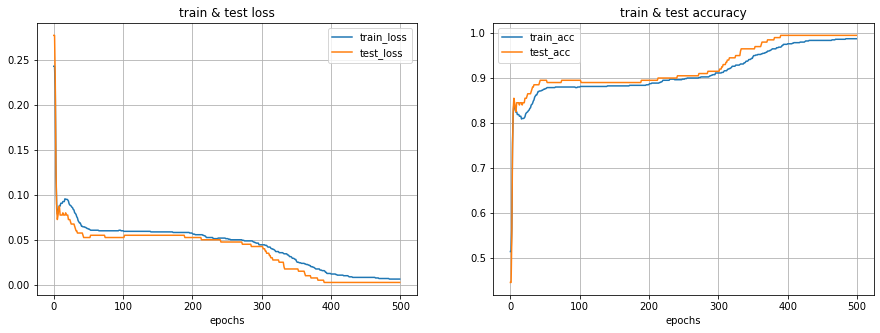

In [8]:
plot_history(history)

# Circles

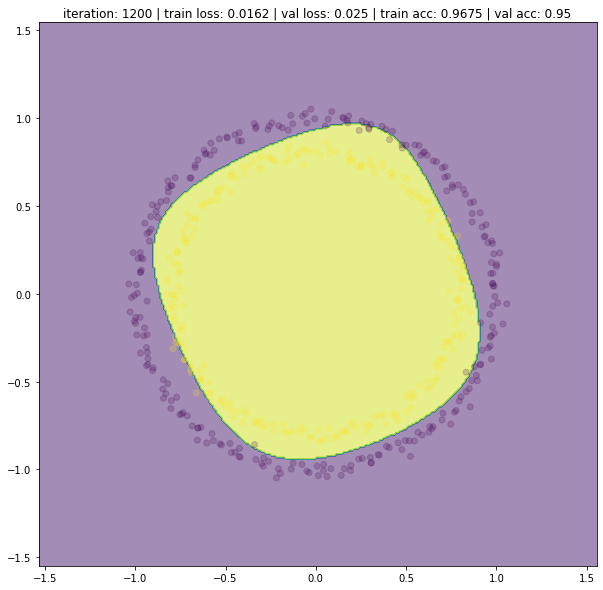

In [9]:
data = datasets.make_circles(n_samples=500, noise=0.025)
X = data[0].T
y = np.expand_dims(data[1], 1).T

neural_net = nn.NeuralNetwork([2, 4, 1], seed=11)
history = neural_net.train(X=X, y=y, batch_size=16, epochs=1201, learning_rate=0.4, print_every=200, validation_split=0.2,
                          tqdm_=False, plot_every=50)

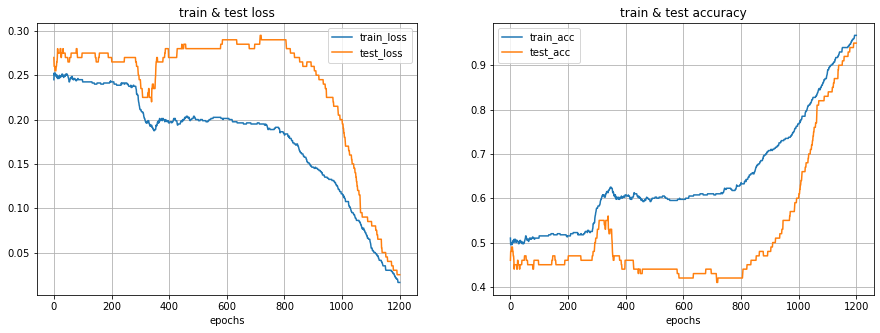

In [10]:
plot_history(history)

# XOR problem

In [11]:
def generate_points(n, centers, labels, amplitude):
    x1_noisy = []
    x2_noisy = []
    y = []
    for center, c in zip(centers, labels):
        x1, x2 = center
        noise_x1 = np.random.rand(n)
        noise_x2 = np.random.rand(n)
        x1_noisy += (noise_x1 + x1).tolist()
        x2_noisy += (noise_x2 + x2).tolist()
        y += [c] * n
    
    X = list(zip(x1_noisy, x2_noisy))
    X = np.array(X)
    y = np.array(y)
    y = np.expand_dims(y, 1)
    
    X = X.T
    y = y.T
    return X, y

X, y = generate_points(500, [(0, 0), (0, 1), (1, 0), (1, 1)], [0, 1, 1, 0], 0.005)

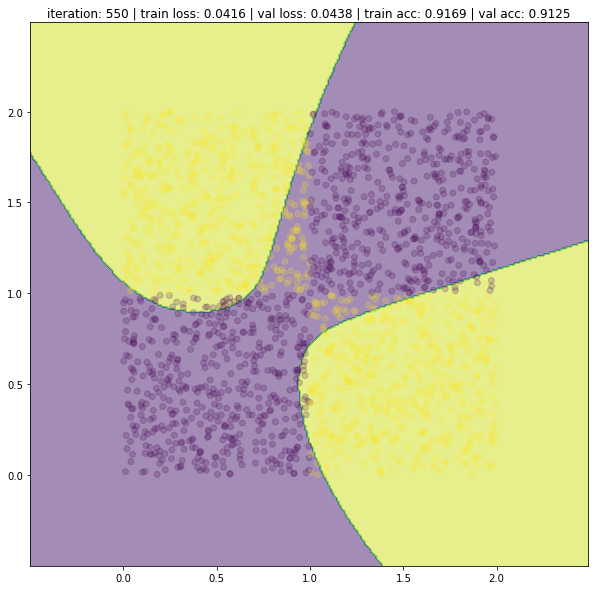

In [12]:
neural_net = nn.NeuralNetwork([2, 4, 1], seed=3)
history = neural_net.train(X=X, y=y, batch_size=64, epochs=551, learning_rate=0.2, print_every=200, validation_split=0.2,
                          tqdm_=False, plot_every=25)

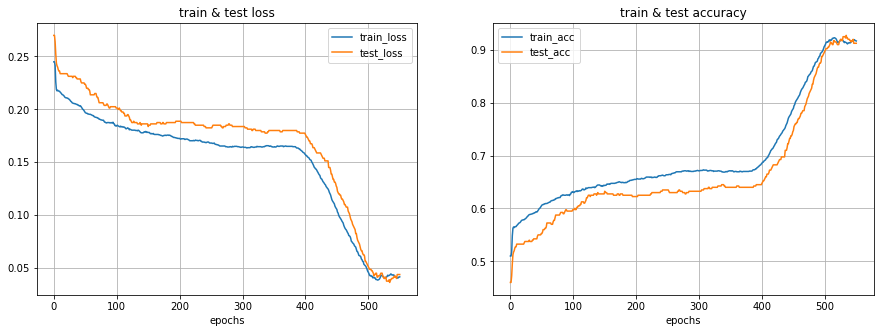

In [13]:
plot_history(history)

# Where to go from here? 

There's room for a lot of improvement:

Here are some guidelines if you want to learn more:

- Go through the code in nn.py: understand each block and how it relates to the formulas in the slides. Most importantly, try to reproduce **everything** from scratch: it's the only way to check if you understood things well.

- Implement a different loss function such as the Binary Cross Entropy loss. For a classification problem, this loss works better than a Mean Square Error. 

- Make the code generic regarding the activation functions so that we can choose any function we want: ReLU, Sigmoid, Tanh, etc.

- Try to code another optimizers: SGD is good but it has some limitations: sometimes it can be stuck in local minima. Look into Adam or RMSProp.

- Play with the hyperparameters and check the validation metrics
